# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

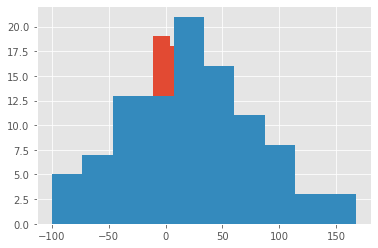

In [3]:
plt.hist(A)
plt.hist(B)

In [4]:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(-1.733800647210997, 0.08451003973499756)

Поскольку тестируется мед.препарат, примем уровень значимости 1%. Мы получаем значение p, равное 0,084 > 0.01, и, таким образом, мы принимаем нулевую гипотезу, то есть - средние значения двух распределений одинаковы и это различие статистически незначимо.

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [5]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

In [6]:
fvalue, pvalue = stats.f_oneway(water, nutri, mineral)

print(f'Статистика = {fvalue: .3f}, p = {pvalue: .6f}')

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, отличаются')

Статистика =  12.526, p =  0.000029
Отклоняем нулевую гипотезу, средние, вероятно, отличаются


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f9cf2500>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f9cf2a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f9cf2230>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f9cf2f20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f9cf31f0>,
 'means': []}

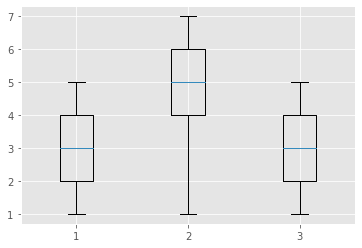

In [7]:
plt.boxplot([water, nutri, mineral])

In [8]:
#Тест Краскела-Уоллиса
stat, p = stats.kruskal(water, nutri, mineral)

print(f'Статистика = {stat: .3f}, p = {p: .3f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распредления, вероятно, различаются')

Статистика =  17.607, p =  0.000
Отклоняем нулевую гипотезу, распредления, вероятно, различаются


### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [9]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

/tmp/ipykernel_12097/974058101.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [10]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


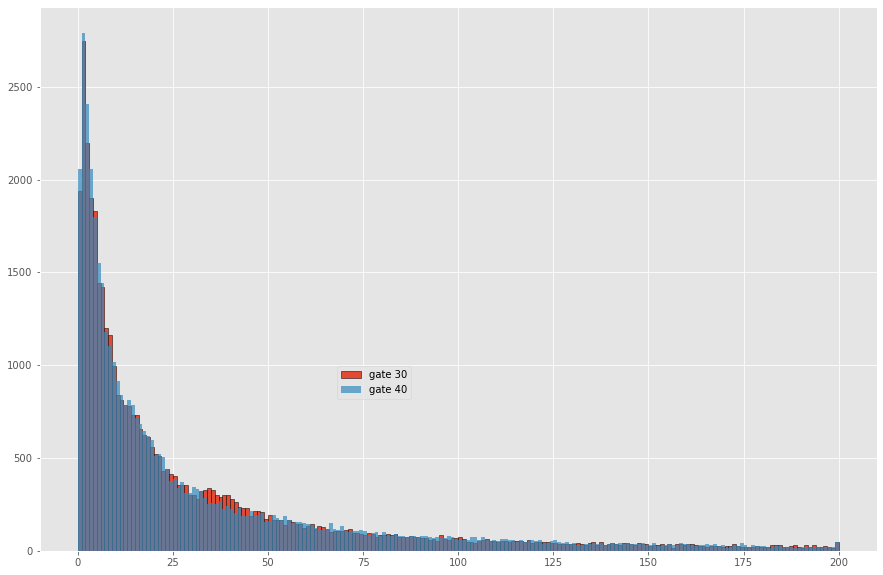

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

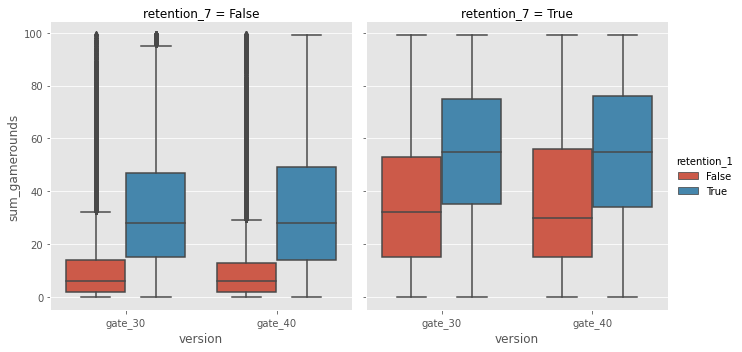

In [12]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

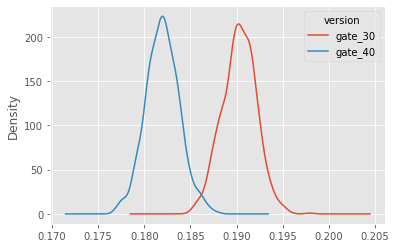

In [13]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [14]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p


(0.7939569526814368, 0.3729086824696095)

In [15]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Напишите Ваш код для решения задачи
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1024331250.500, p=0.050


Ниже, пожалуйста, напишите Ваши выводы на основании решения:

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [16]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

/tmp/ipykernel_12097/3650493355.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [17]:
#Покемоны класса Grass
pokemon_grass = pokemon.loc[(pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] != 'Rock') & 
                            ((pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass'))]
pokemon_grass 

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False
784,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False


In [18]:
pokemon_grass.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [19]:
#Покемоны класса Rock
pokemon_rock = pokemon.loc[((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')) & 
                            (pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] != 'Grass')]
pokemon_rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False


In [20]:
pokemon_rock.loc[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [21]:
fvalue, pvalue = stats.f_oneway(pokemon_grass['Attack'], pokemon_rock['Attack'])

print(f'Статистика = {fvalue: .3f}, p = {pvalue: .6f}')

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, отличаются')

Статистика =  13.909, p =  0.000273
Отклоняем нулевую гипотезу, средние, вероятно, отличаются


(array([ 1.,  1., 10.,  5.,  8., 10.,  7.,  6.,  5.,  3.]),
 array([ 10. ,  25.5,  41. ,  56.5,  72. ,  87.5, 103. , 118.5, 134. ,
        149.5, 165. ]),
 <BarContainer object of 10 artists>)

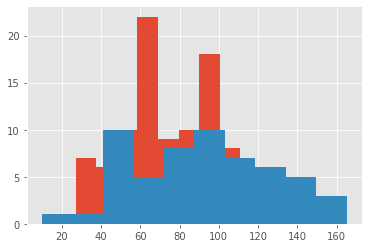

In [22]:
plt.hist(pokemon_grass['Attack'])
plt.hist(pokemon_rock['Attack'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f98cb3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f98cb910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f98cb160>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f98ec1c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f98ec4f0>,
 'means': []}

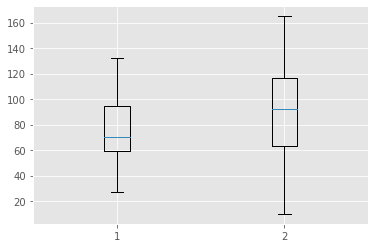

In [23]:
plt.boxplot([pokemon_grass['Attack'], pokemon_rock['Attack']])

In [24]:
if pokemon_grass['Attack'].mean() > pokemon_rock['Attack'].mean():
    print('Подозрения профессора Оука оправданы')
else:
      print('Подозрения профессора Оука не оправданы')    


Подозрения профессора Оука не оправданы


Обычная атака покемонов класса 'Grass' отличается от обычной атаки покемонов класса 'Rock'. Судя по гистограмме, где красным цветом обозначен класс 'Grass',а красным 'Rock', и boxplot - обычная атака покемонов класса 'Rock' сильнее.

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [25]:
#Покемоны класса Water
pokemon_water = pokemon.loc[(pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] != 'Normal') & 
                            ((pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water'))]
pokemon_water

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False
...,...,...,...,...,...,...,...,...,...,...,...
759,760,Barbaracle,Rock,Water,72,105,115,54,86,68,False
760,761,Skrelp,Poison,Water,50,60,60,60,60,30,False
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False
763,764,Clawitzer,Water,NaN,71,73,88,120,89,59,False


In [26]:
pokemon_water.loc[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [27]:
#Покемоны класса Normal
pokemon_normal = pokemon.loc[(pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] != 'Water') & 
                            ((pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal'))]
pokemon_normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False
...,...,...,...,...,...,...,...,...,...,...,...
735,736,Litleo,Fire,Normal,62,50,58,73,54,72,False
736,737,Pyroar,Fire,Normal,86,68,72,109,66,106,False
744,745,Furfrou,Normal,NaN,75,80,60,65,90,102,False
764,765,Helioptile,Electric,Normal,44,38,33,61,43,70,False


In [28]:
pokemon_normal.loc[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [29]:
fvalue, pvalue = stats.f_oneway(pokemon_water['Speed'], pokemon_normal['Speed'])

print(f'Статистика = {fvalue: .3f}, p = {pvalue: .6f}')

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, отличаются')

Статистика =  4.626, p =  0.032554
Отклоняем нулевую гипотезу, средние, вероятно, отличаются


(array([ 2.,  8.,  6., 17., 11., 17., 16., 13.,  8.,  3.]),
 array([  5.,  18.,  31.,  44.,  57.,  70.,  83.,  96., 109., 122., 135.]),
 <BarContainer object of 10 artists>)

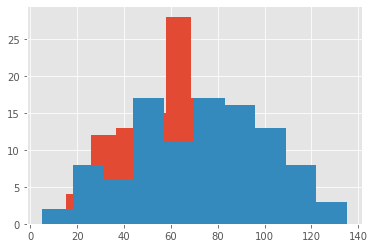

In [30]:
plt.hist(pokemon_water['Speed'])
plt.hist(pokemon_normal['Speed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f9ac91b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f9ac9810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f9ac8ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f9ac9d80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f9ac9fc0>,
 'means': []}

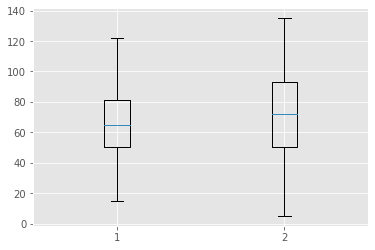

In [31]:
plt.boxplot([pokemon_water['Speed'], pokemon_normal['Speed']])

In [32]:
if pokemon_water['Speed'].mean() > pokemon_normal['Speed'].mean():
    print('Подозрения профессора Оука оправданы')
else:
      print('Подозрения профессора Оука не оправданы')    

Подозрения профессора Оука не оправданы


Покемоны класса 'Normal' в среднем быстрее покемонов класса 'Water'.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [33]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [34]:
pokemon_fast = pokemon[pokemon['Name'].isin(['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny'])]
pokemon_not_treathed = pokemon[~pokemon['Name'].isin(['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny'])]

In [35]:
pokemon_fast.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,4.000000,4.00,4.000000,4.000000,4.00000,4.000000,4.000000
mean,249.500000,58.75,121.500000,62.250000,98.50000,80.250000,145.000000
std,236.750924,7.50,48.121374,23.528352,76.28237,21.453438,7.071068
min,20.000000,50.00,50.000000,40.000000,15.00000,50.000000,135.000000
25%,59.000000,53.75,114.500000,47.500000,44.25000,72.500000,142.500000
50%,250.500000,60.00,143.000000,57.500000,102.00000,87.500000,147.500000
75%,441.000000,65.00,150.000000,72.250000,156.25000,95.250000,150.000000
max,477.000000,65.00,150.000000,94.000000,175.00000,96.000000,150.000000


In [36]:
pokemon_not_treathed.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,401.258794,69.311558,78.787688,73.900754,72.690955,71.860553,67.891960
std,230.958584,25.583769,32.263130,31.217540,32.416705,27.861371,28.614785
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,201.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,601.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f98217b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f9821d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f9821570>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f9822590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f98228c0>,
 'means': []}

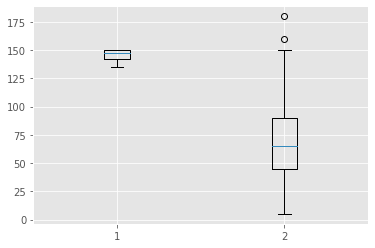

In [37]:
plt.boxplot([pokemon_fast['Speed'], pokemon_not_treathed['Speed']]) #есть выбросы у обычных покемонов (>150) уберём

In [38]:
pokemon_not_treathed = pokemon_not_treathed.drop(pokemon_not_treathed.loc[pokemon_not_treathed['Speed'] > 150].index)
pokemon_not_treathed.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,401.327456,69.346348,78.753149,73.916877,72.691436,71.865239,67.634761
std,231.227240,25.605105,32.296186,31.234792,32.437881,27.878239,28.182572
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,201.250000,50.000000,55.000000,50.000000,49.250000,50.000000,45.000000
50%,400.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,601.750000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,150.000000


In [39]:
#Критерий Стьюдента
stat, p = stats.ttest_ind(pokemon_fast['Speed'], pokemon_not_treathed['Speed'], equal_var=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, отличаются')

Statistics=21.056, p=0.000
Отклоняем нулевую гипотезу, средние, вероятно, отличаются


In [40]:
if pokemon_fast['Speed'].mean() > pokemon_not_treathed['Speed'].mean():
      print('Покемоны получившие сыворотку, действительно, быстрее других покемонов')
else:
      print('Покемоны получившие сыворотку в среднем имеют такую же скорость, что и обычные покемоны')     

Покемоны получившие сыворотку, действительно, быстрее других покемонов


Сыворотка работает.

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [41]:
#Легендарные покемоны
pokemon_legendary = pokemon[pokemon['Legendary'] == True]

pokemon_legendary.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,520.353846,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615
std,192.473085,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323
min,157.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000
25%,420.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000
50%,541.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000
75%,705.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000
max,800.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000


In [42]:
#Нелегендарные покемоны
pokemon_not_legendary = pokemon[pokemon['Legendary'] == False]

pokemon_not_legendary.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,389.900680,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
std,231.331202,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,190.500000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000
50%,379.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000
75%,594.500000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000
max,792.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000


In [43]:
#Смотрим сумму характеристик HP, Attack, Defense
pokemon_legendary['Sum'] = pokemon_legendary.apply(lambda line: line['Attack'] + line['HP'] + line['Defense'], axis = 1)
pokemon_not_legendary['Sum'] = pokemon_not_legendary.apply(lambda line: line['Attack'] + line['HP'] + line['Defense'], axis = 1)

if pokemon_legendary['Sum'].mean() > pokemon_not_legendary['Sum'].mean():
      print('Среднее суммы характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов')
else:
      print('Среднее суммы характеристик HP, Attack, Defense у легендарных покемонов меньше, чем у других покемонов')

Среднее суммы характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов


/tmp/ipykernel_12097/3897373349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_legendary['Sum'] = pokemon_legendary.apply(lambda line: line['Attack'] + line['HP'] + line['Defense'], axis = 1)
/tmp/ipykernel_12097/3897373349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_not_legendary['Sum'] = pokemon_not_legendary.apply(lambda line: line['Attack'] + line['HP'] + line['Defense'], axis = 1)


In [44]:
#Смотрим произведение характеристик HP, Attack, Defense
pokemon_legendary['Mult'] = pokemon_legendary.apply(lambda line: line['Attack'] * line['HP'] * line['Defense'], axis = 1)
pokemon_not_legendary['Mult'] = pokemon_not_legendary.apply(lambda line: line['Attack'] * line['HP'] * line['Defense'], axis = 1)

if pokemon_legendary['Mult'].mean() > pokemon_not_legendary['Mult'].mean():
      print('Среднее произведения характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов')
else:
      print('Среднее произведения характеристик HP, Attack, Defense у легендарных покемонов меньше, чем у других покемонов')

Среднее произведения характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов


/tmp/ipykernel_12097/1086860571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_legendary['Mult'] = pokemon_legendary.apply(lambda line: line['Attack'] * line['HP'] * line['Defense'], axis = 1)
/tmp/ipykernel_12097/1086860571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_not_legendary['Mult'] = pokemon_not_legendary.apply(lambda line: line['Attack'] * line['HP'] * line['Defense'], axis = 1)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f9c0b9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f9c0a800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f9c0ba60>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f9c0a650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f9c0a9b0>,
 'means': []}

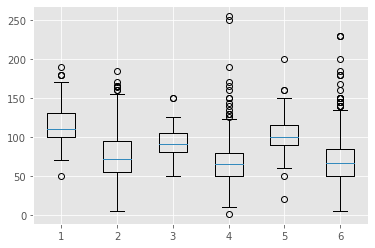

In [45]:
plt.boxplot([pokemon_legendary['Attack'], pokemon_not_legendary['Attack'], 
            pokemon_legendary['HP'], pokemon_not_legendary['HP'],
            pokemon_legendary['Defense'], pokemon_not_legendary['Defense']])

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [46]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [47]:
pokemon_best_defence_class = pokemon[pokemon['Class 1'].isin(['Rock', 'Ground','Steel','Ice']) | pokemon['Class 2'].isin(['Rock', 'Ground','Steel','Ice'])]
pokemon_not_best_defence_class = pokemon[~(pokemon['Class 1'].isin(['Rock', 'Ground','Steel','Ice']) | pokemon['Class 2'].isin(['Rock', 'Ground','Steel','Ice']))]

In [48]:
pokemon_best_defence_class.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,439.052910,70.814815,90.507937,95.666667,69.285714,75.275132,59.624339
std,211.696761,22.797503,32.911328,38.516092,31.247346,30.152070,27.638080
min,33.000000,10.000000,10.000000,15.000000,10.000000,25.000000,5.000000
25%,266.000000,55.000000,65.000000,70.000000,45.000000,50.000000,40.000000
50%,428.000000,70.000000,85.000000,90.000000,65.000000,72.000000,55.000000
75%,626.000000,89.000000,112.000000,115.000000,85.000000,90.000000,76.000000
max,797.000000,130.000000,180.000000,230.000000,170.000000,230.000000,150.000000


In [49]:
pokemon_not_best_defence_class.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,388.574468,68.777414,75.441899,67.091653,73.913257,70.859247,70.954173
std,235.648639,26.322580,31.501566,24.965382,33.113674,27.010924,28.989221
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,180.500000,50.000000,53.000000,50.000000,50.000000,50.000000,50.000000
50%,384.000000,65.000000,71.000000,65.000000,65.000000,65.000000,69.000000
75%,592.500000,80.000000,95.000000,80.000000,95.000000,89.000000,91.000000
max,800.000000,255.000000,190.000000,180.000000,194.000000,160.000000,180.000000


In [50]:
fvalue, pvalue = stats.f_oneway(pokemon_best_defence_class['Defense'], pokemon_not_best_defence_class['Defense'])

print(f'Статистика = {fvalue: .3f}, p = {pvalue: .6f}')

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, отличаются')

Статистика =  142.706, p =  0.000000
Отклоняем нулевую гипотезу, средние, вероятно, отличаются


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f9a5d780>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f9a5d1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f9a5fa90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f9a5cdf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f9a5c400>,
 'means': []}

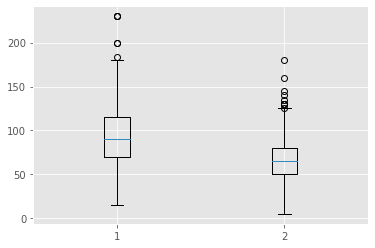

In [51]:
plt.boxplot([pokemon_best_defence_class['Defense'], pokemon_not_best_defence_class['Defense']])

In [52]:
if pokemon_best_defence_class['Defense'].mean() > pokemon_not_best_defence_class['Defense'].mean():
    print('Сила обычной защиты у классов Rock, Ground,Steel,Ice в среднем выше')
else:
      print('Сила обычной защиты у классов Rock, Ground,Steel,Ice в среднем такая же как и у остальных покемонов')    


Сила обычной защиты у классов Rock, Ground,Steel,Ice в среднем выше


Сравним классы Rock, Ground,Steel,Ice между собой по силе обычной защиты

In [53]:
pokemon_rock_def = pokemon.loc[pokemon['Class 1'].isin(['Rock']) | pokemon['Class 2'].isin(['Rock'])]
pokemon_ground_def = pokemon.loc[pokemon['Class 1'].isin(['Ground']) | pokemon['Class 2'].isin(['Ground'])]
pokemon_steel_def = pokemon.loc[pokemon['Class 1'].isin(['Steel']) | pokemon['Class 2'].isin(['Steel'])]
pokemon_ice_def = pokemon.loc[pokemon['Class 1'].isin(['Ice']) | pokemon['Class 2'].isin(['Ice'])]

In [54]:
fvalue, pvalue = stats.f_oneway(pokemon_rock_def['Defense'], pokemon_ground_def['Defense'],
                               pokemon_steel_def['Defense'], pokemon_ice_def['Defense'])

print(f'Статистика = {fvalue: .3f}, p = {pvalue: .6f}')

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, отличаются')

Статистика =  10.820, p =  0.000001
Отклоняем нулевую гипотезу, средние, вероятно, отличаются


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f94350c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f9436770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f9436050>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f94360e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f9435d80>,
 'means': []}

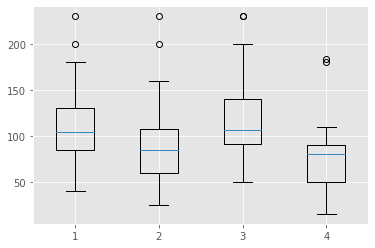

In [55]:
plt.boxplot([pokemon_rock_def['Defense'], pokemon_ground_def['Defense'],
                               pokemon_steel_def['Defense'], pokemon_ice_def['Defense']])